In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample = "H:/kfold_42_gb_vadym/dataset1/train/AD/sub-ADNI003S6833_ses-M00_T1w_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.pt"

In [3]:
#please pass single sample location including sample name to visualize slices in a selected range
#sample must be pyrorch tensor in .pt format
#please pass start and end slice to the function to generate plots

# for plotting axial plane pass parameter plane = 'a'
# for plotting coronal plane pass parameter plane = 'c'
# for plotting sagittal plane pass parameter plane = 's'


#this function by default can handle slice rannge of 20. So the difference between start and end slide must be 20 or less.


def generate_plot(sample_location, start_slice, end_slice, plane, fig_height=20, fig_width=20, vertical_plot_num=5, horizontal_plot_num=4): 
    fig, axis = plt.subplots(vertical_plot_num, horizontal_plot_num, figsize=(fig_height, fig_width))
    counter= start_slice
    for i in range(vertical_plot_num):
        for j in range(horizontal_plot_num):
            if counter<end_slice:
                
                if plane=='a':
                    selected_slice = torch.load(sample_location)[0, :, :, counter]
                if plane =='c':
                    selected_slice = torch.load(sample_location)[0, :, counter, :]
                if plane == "s":
                    selected_slice = torch.load(sample_location)[0, counter, :, :]
                
                selected_slice = selected_slice.detach().numpy()
                #print(type(selected_slice))
                #selected_slice = np.swapaxes(selected_slice, 1,0 )
                selected_slice = np.rot90(selected_slice)
                axis[i][j].imshow(selected_slice, cmap="bone")
                axis[i][j].axis("on")
                counter+=1     
            else:
                break


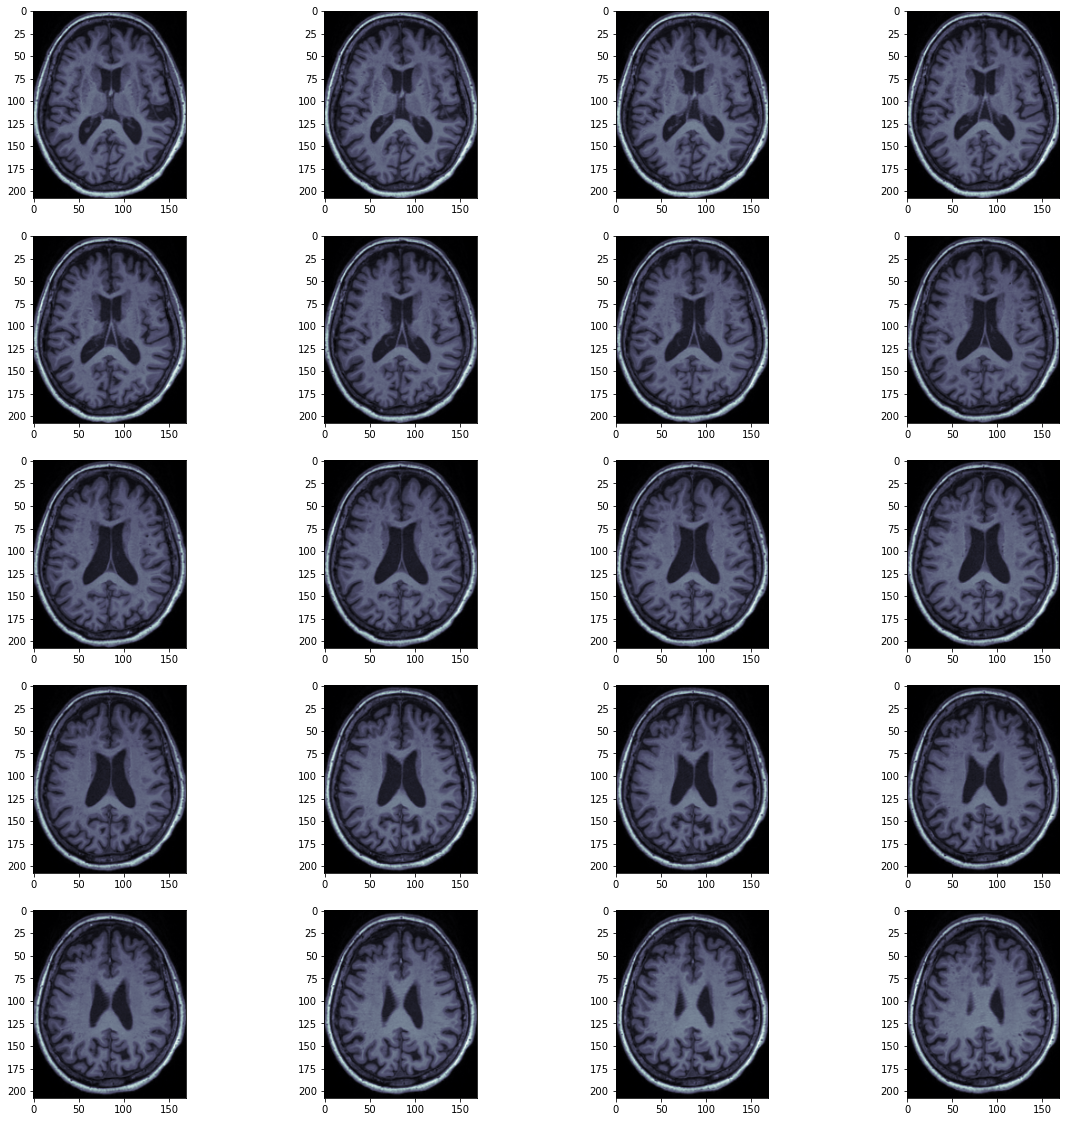

In [4]:
#axial plots slice range 90 to 110
generate_plot(sample_location = sample, start_slice = 90, end_slice = 110, plane='a')

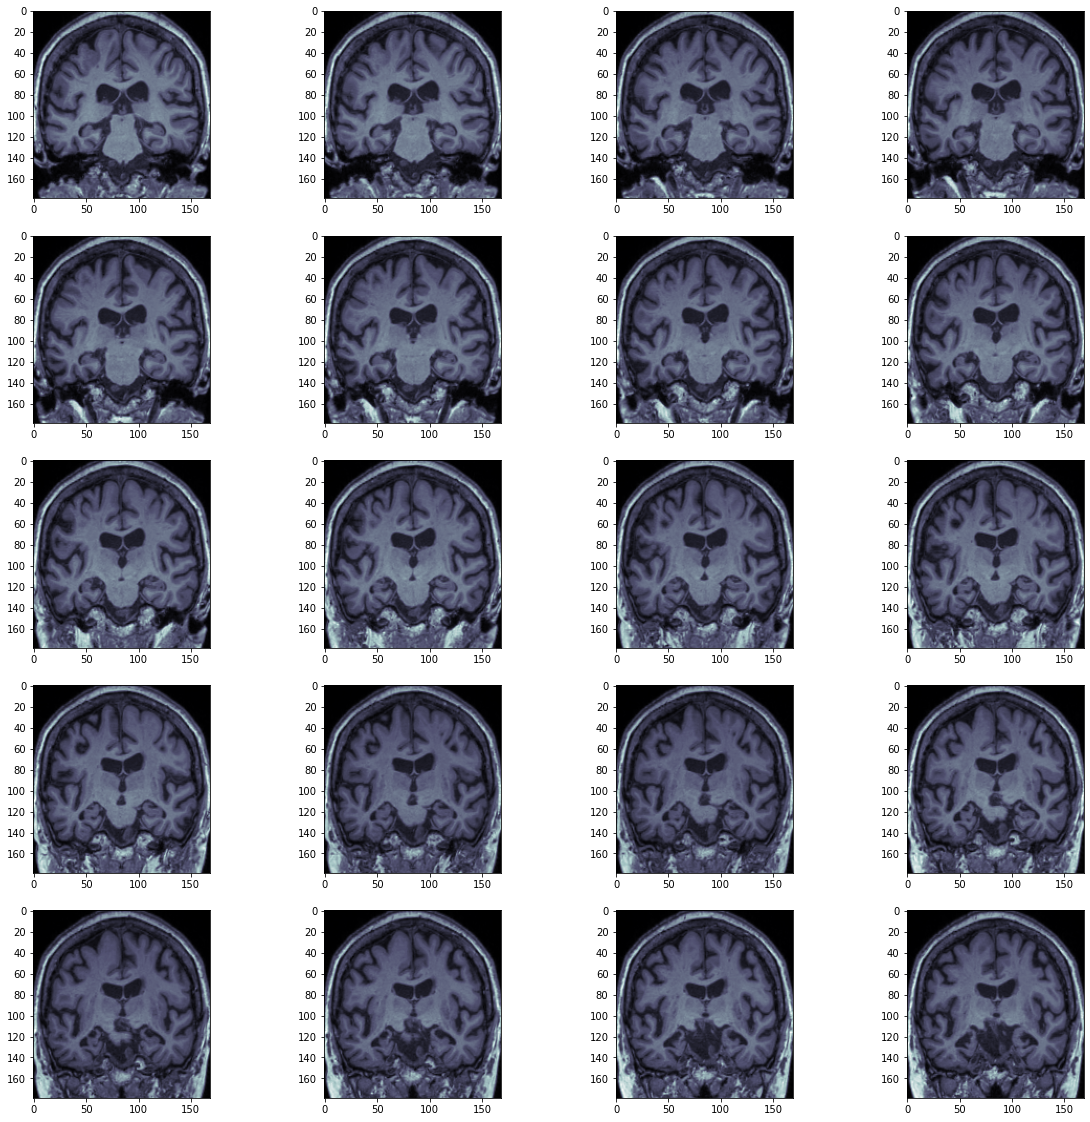

In [5]:
#coronal plots slice range 90 to 110
generate_plot(sample_location = sample, start_slice = 90, end_slice = 110, plane='c')

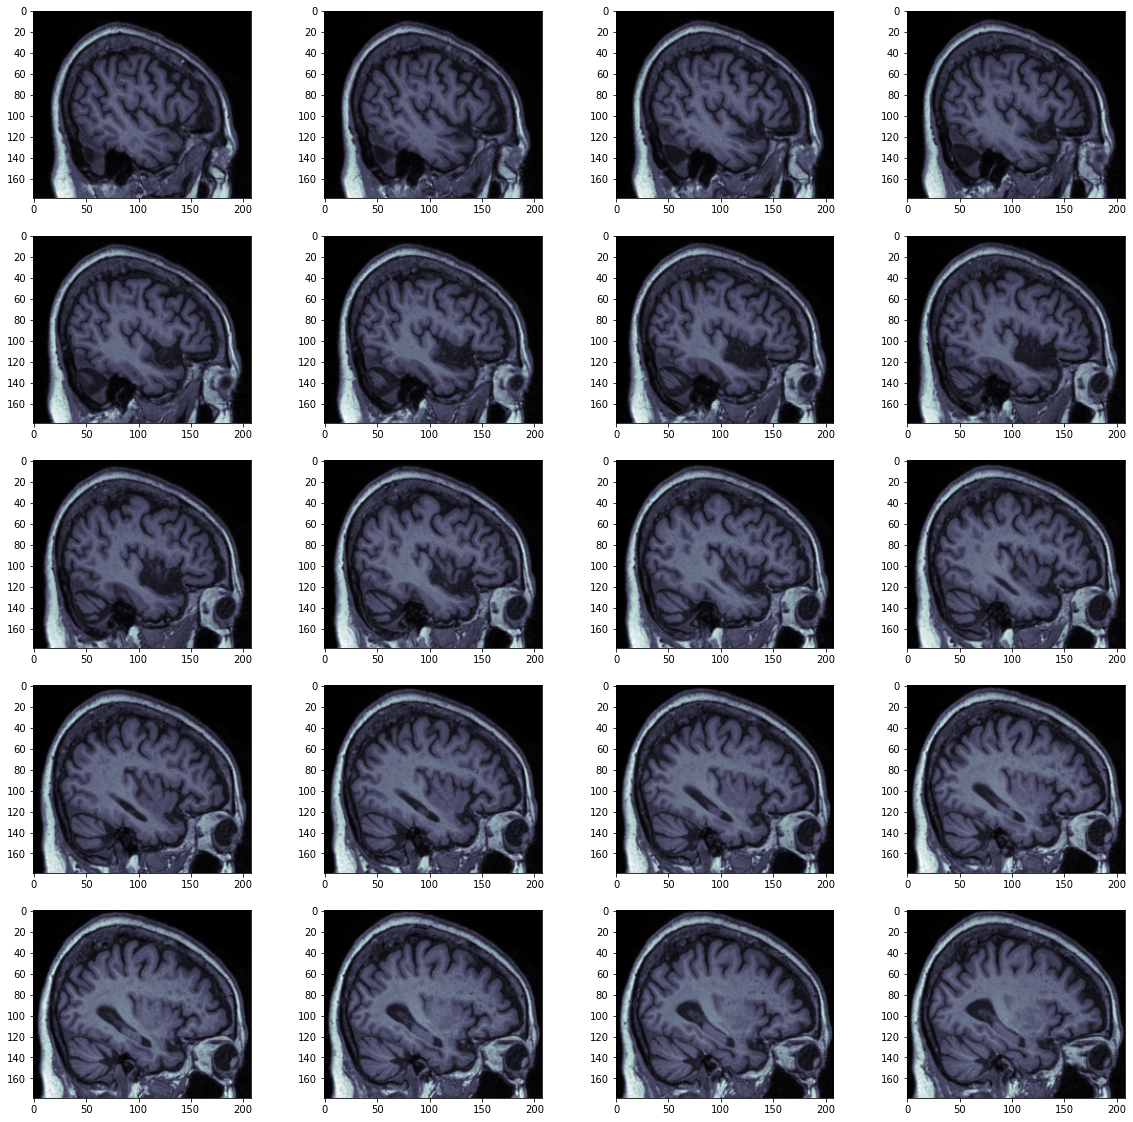

In [6]:
#sagittal plots slice range 33 to 53
generate_plot(sample_location = sample, start_slice = 33, end_slice = 53, plane='s')